# [Kaggle 링크](https://www.kaggle.com/vpapenko/nails-segmentation)

- 데이터 셋 추가 하기 위함  
- kaggle 모델은 정확도가 너무 낮음  


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/capstone/segmentation/fs/fs')

%matplotlib inline
import utils_nails
from utils_nails import *

datasetpath='/content/gdrive/MyDrive/capstone/segmentation/fs/fs/nails.tar'

import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

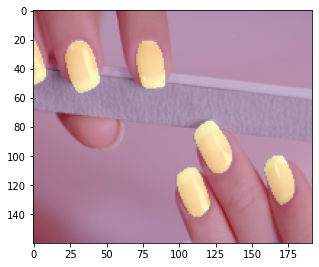

In [ ]:
# initialize instance
# dataset = datasetpath
seg = fingernailseg(datasetpath)
# show random example from training set
seg.plot_example(np.random.randint(seg.X_train.__len__()))
# create U-Net model
seg.create_unet()

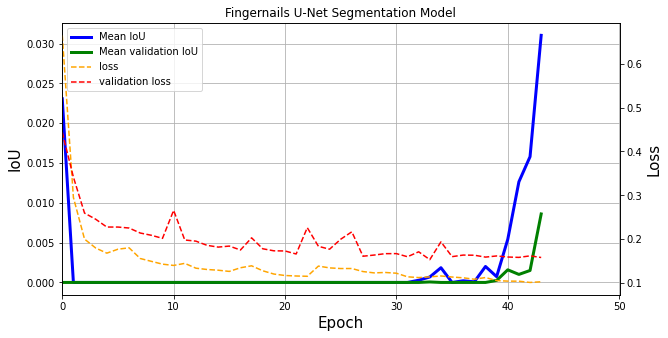

Epoch 00044: early stopping


In [ ]:
seg.fit()
seg.load_model()

In [ ]:
mask = seg.predict()
raw = seg.X_test
plt.figure(figsize=(25,15))
for i in range(len(mask)):
    plt.subplot(3, 7, i+1)
    plt.imshow(raw[i])
    plt.imshow(mask[i,:,:,0], alpha=0.3)

ValueError: ignored

In [ ]:
#내손사진
a=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/11.jpg')
b=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/114.jpg')
c=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/0.jpg')
d=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/88.jpg')
e=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/000.jpg')
f=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/1313.jpg')
g=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/14144.jpg')
h=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/99.jpg')
test=[]
a=np.array(a.resize((192,160)))
b=np.array(b.resize((192,160)))
c=np.array(c.resize((192,160)))
d=np.array(d.resize((192,160)))
e=np.array(e.resize((192,160)))
f=np.array(f.resize((192,160)))
g=np.array(g.resize((192,160)))
h=np.array(h.resize((192,160)))
test.append(a)
test.append(b)
test.append(c)
test.append(d)
test.append(e)
test.append(f)
test.append(g)
test.append(h)
test=np.array(test).astype('float32')
test/=255

ans=seg.model.predict(test,batch_size=4,verbose=0)

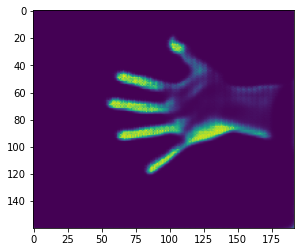

In [ ]:
plt.imshow(ans[-6,:,:,-1])

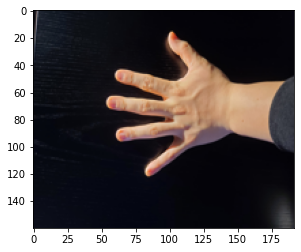

In [ ]:
plt.imshow(test[-6,:,:])

In [ ]:
datasetpath1='/content/gdrive/MyDrive/capstone/segmentation/fs/fs/nails.tar.gz'
bb=tarfile.open(datasetpath1)
bb.extractall()
bb.close()
mask=os.listdir('nails/mask')
raw=os.listdir('nails/raw')

In [ ]:
files=list(set(raw).intersection(mask))
test_files=list(set(mask).symmetric_difference(raw))

In [ ]:
test_files[0]

'None_20170327-234218.png'

In [ ]:
cv2_imshow(test_files[0])

AttributeError: ignored